# Mall customer segmentation using K means and Agglomerative Clustering(Aditya Chowdhury)

Importing necessary libraries and loading the dataset

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

mcs=pd.read_csv('Mall_Customers.csv')
mcs

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Data Shape

In [2]:
mcs.shape

(200, 5)

Data detailed information

In [3]:
mcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Data description

In [4]:
mcs.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Checking null values

In [5]:
mcs.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Label Encoding the categorical column

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(mcs['Gender'])
mcs['Gender']=label_encoder.transform(mcs['Gender'])
mcs.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Distribution of data

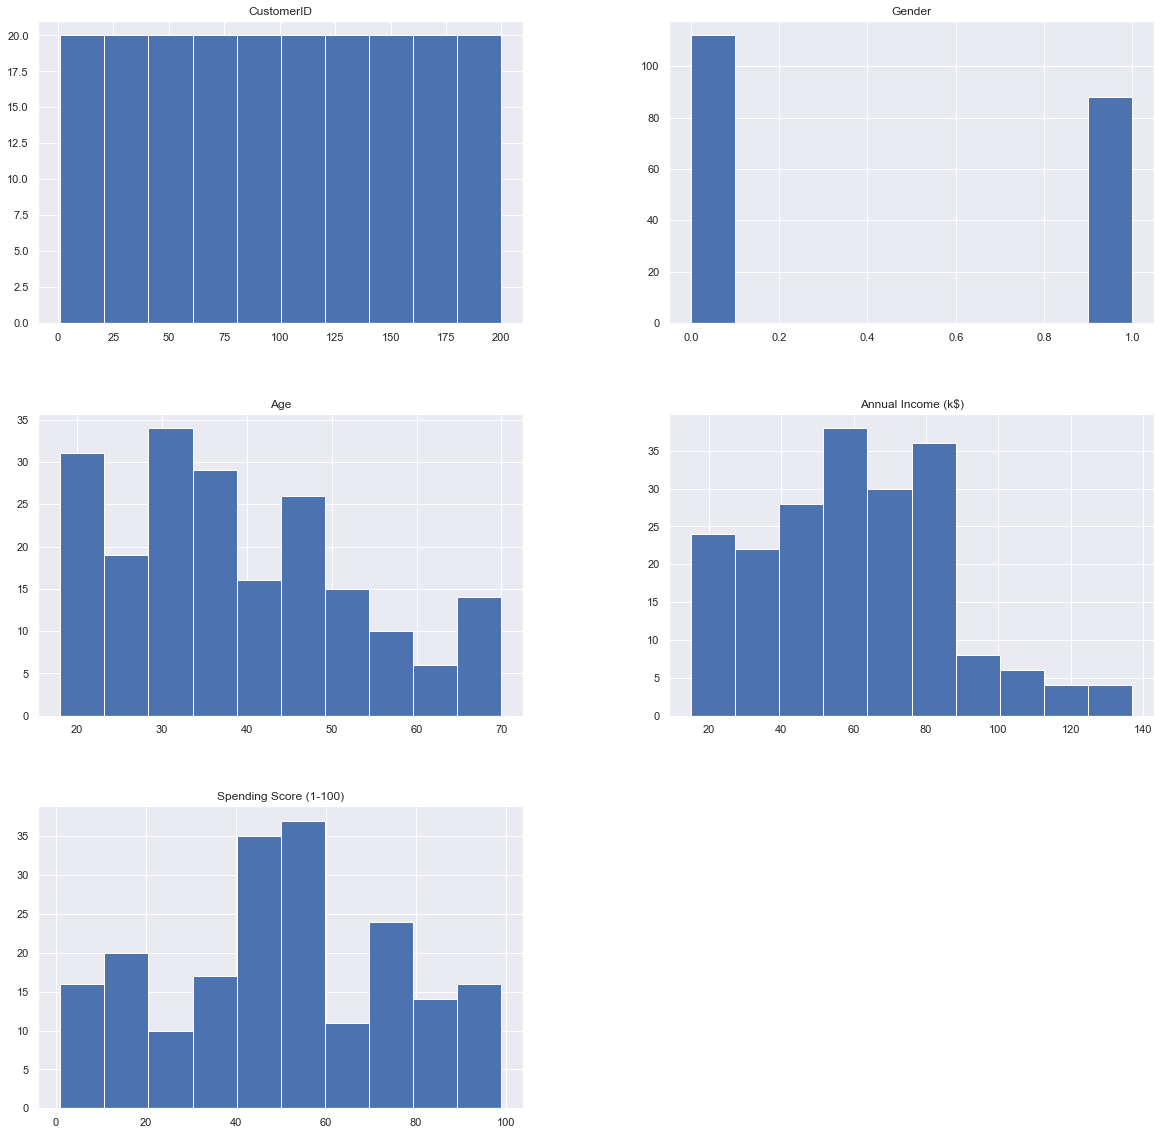

In [7]:
mcs.hist(figsize=(20,20))
plt.show()

Distribution of data

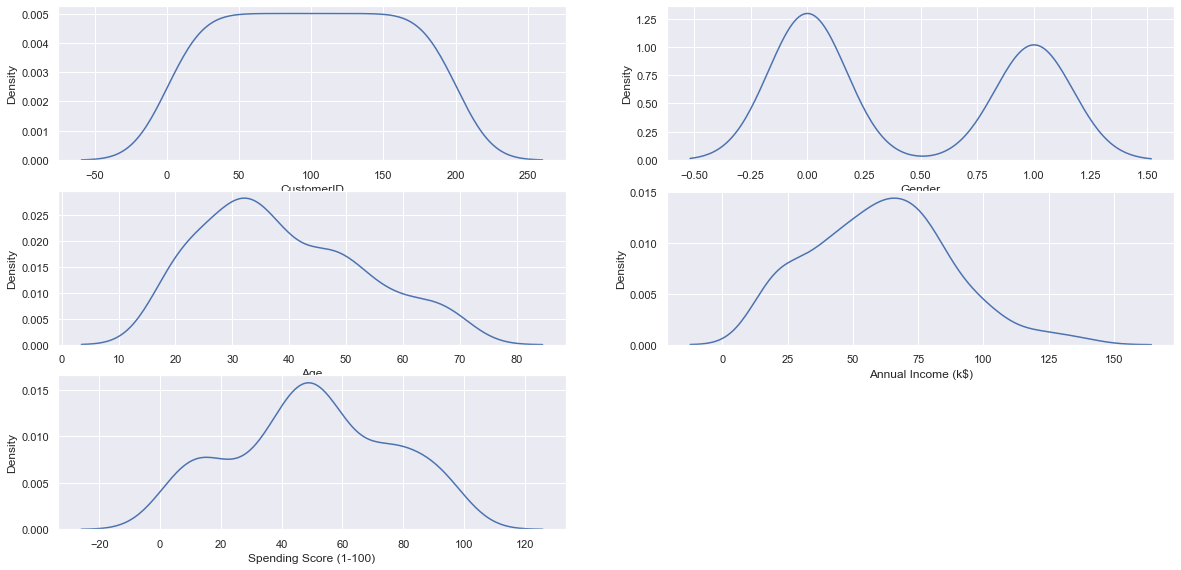

In [8]:
plt.figure(figsize=(20,30))
for i, col in enumerate(mcs.columns):
    if mcs[col].dtype!='object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(mcs[col],ax=ax)
        
plt.show()

Checking missing values

<AxesSubplot:>

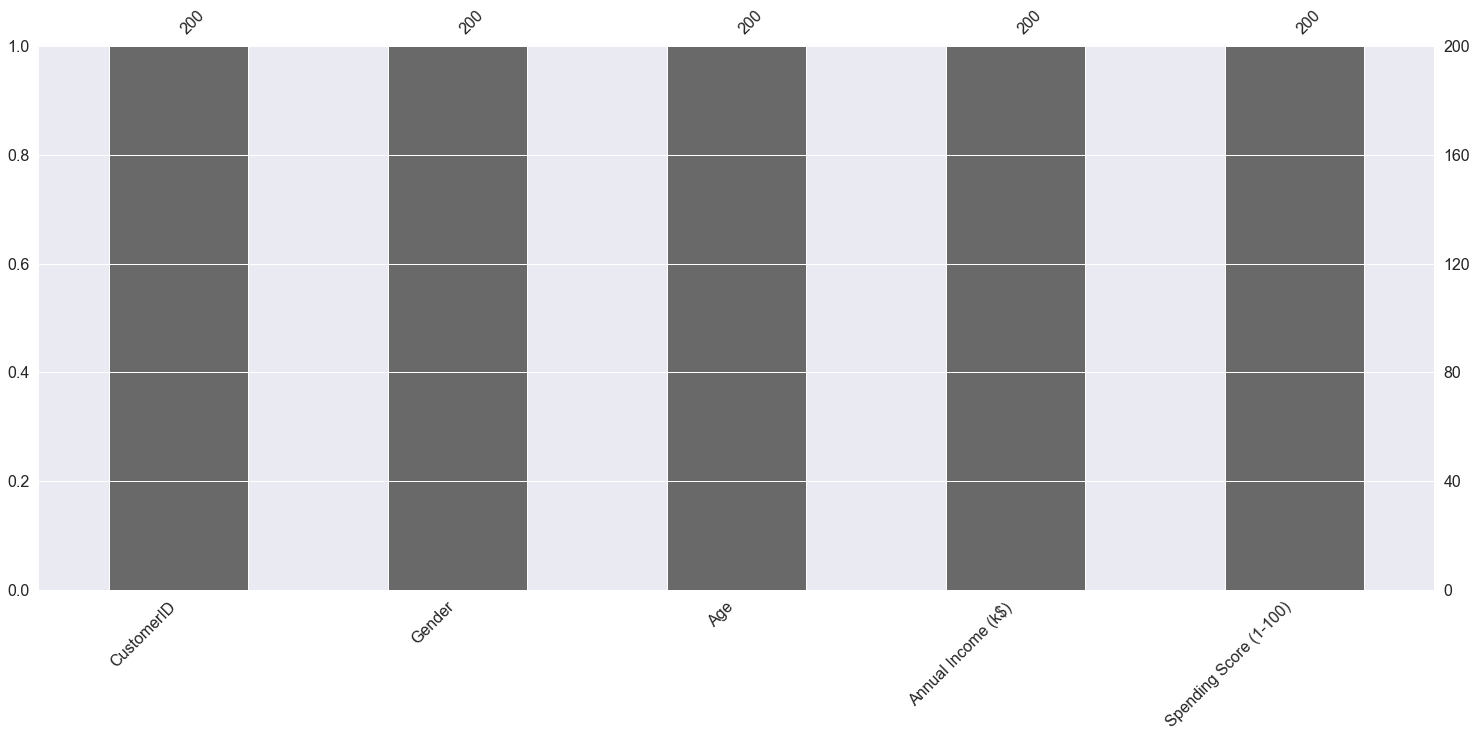

In [9]:
msno.bar(mcs)

Checking duplicate values

In [10]:
mcs[mcs.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


Checking for Outliers

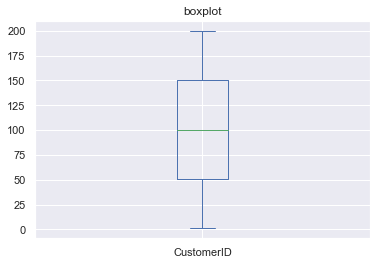

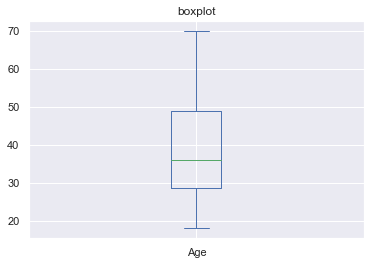

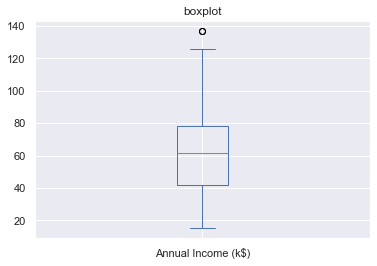

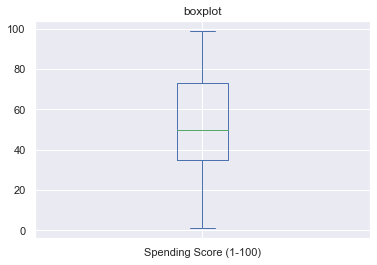

In [11]:
df=mcs.drop(columns=['Gender'])
for col in df:
    a=mcs[col].plot(kind='box',title='boxplot')
    plt.show()

Outlier treatment of data

In [12]:
Q1=mcs['Annual Income (k$)'].quantile(.25)
Q3=mcs['Annual Income (k$)'].quantile(.75)
IQR=Q3-Q1
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)
mcs['Annual Income (k$)']=np.where(mcs['Annual Income (k$)']>upper,upper,np.where(mcs['Annual Income (k$)']<lower,lower,mcs['Annual Income (k$)']))

Outliers have been removed

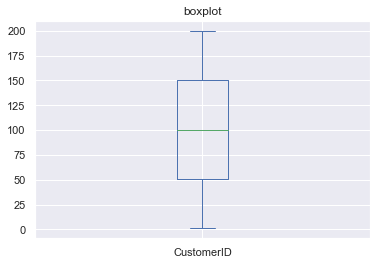

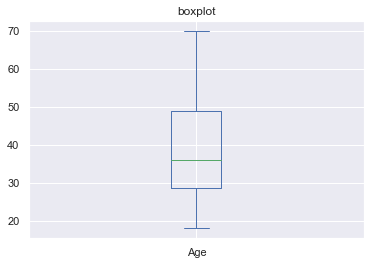

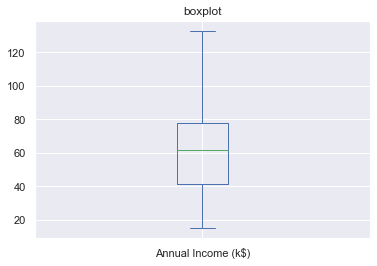

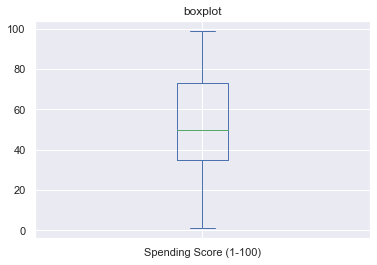

In [13]:
for col in df:
    a=mcs[col].plot(kind='box',title='boxplot')
    plt.show()

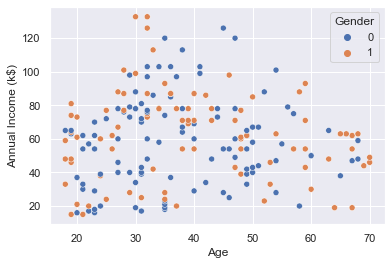

In [15]:
sns.scatterplot(x='Age',y='Annual Income (k$)',hue='Gender',data=mcs)
plt.show()

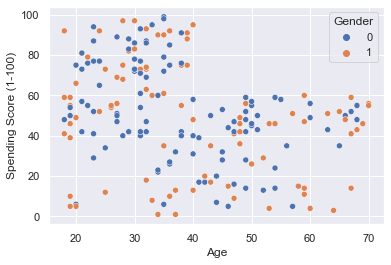

In [16]:
sns.scatterplot(x='Age',y='Spending Score (1-100)',hue='Gender',data=mcs)
plt.show()

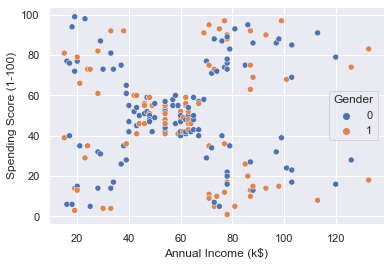

In [17]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',data=mcs)
plt.show()

Correlation Matrix

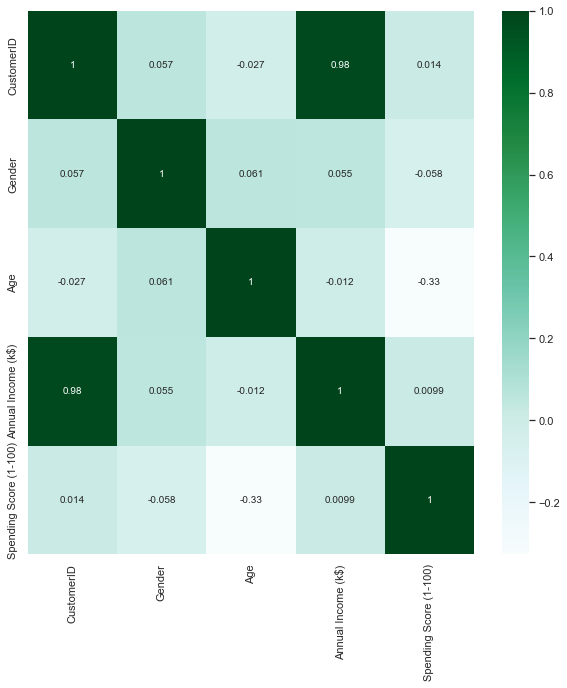

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(mcs.corr(),cbar=True,cmap='BuGn',annot=True)
plt.show()

# K-Means Clustering

Clustering 2 features

Finding optimal K using Elbow Method

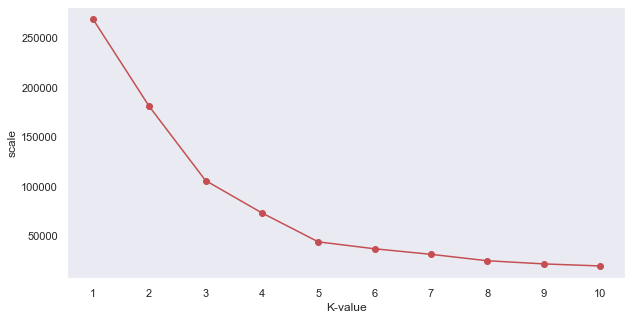

In [20]:
f2=mcs[['Annual Income (k$)','Spending Score (1-100)']]
from sklearn.cluster import KMeans
arr1=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(f2)
    arr1.append(km.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),arr1,'r-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('scale')
plt.xticks(np.arange(1,11,1))
plt.show()


Finding optimal K using Silhouette Method

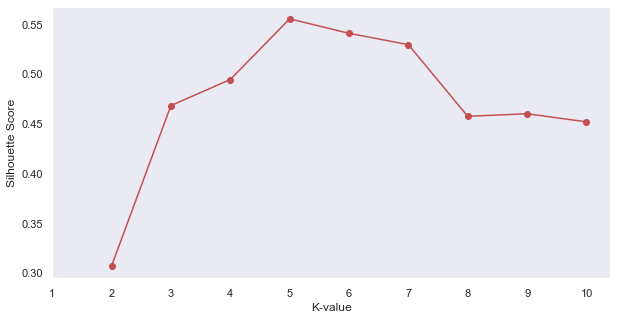

In [21]:
f2=mcs[['Annual Income (k$)','Spending Score (1-100)']]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhouette_avg=[]

for i in range(2,11):
    km=KMeans(n_clusters=i)
    km.fit(f2)
    silhouette_avg.append(silhouette_score(f2,km.labels_))


plt.figure(figsize=(10,5))
plt.plot(range(2,11),silhouette_avg,'r-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(1,11,1))
plt.show()

So K=5

In [22]:
km1=KMeans(n_clusters=5)
km1.fit(f2)
l1=km1.predict(f2)
mcs1=mcs
mcs1['Label']=l1
mcs1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15.00,39,1
1,2,1,21,15.00,81,4
2,3,0,20,16.00,6,1
3,4,0,23,16.00,77,4
4,5,0,31,17.00,40,1
...,...,...,...,...,...,...
195,196,0,35,120.00,79,0
196,197,0,45,126.00,28,3
197,198,1,32,126.00,74,0
198,199,1,32,132.75,18,3


Cluster visualization via scatter plot

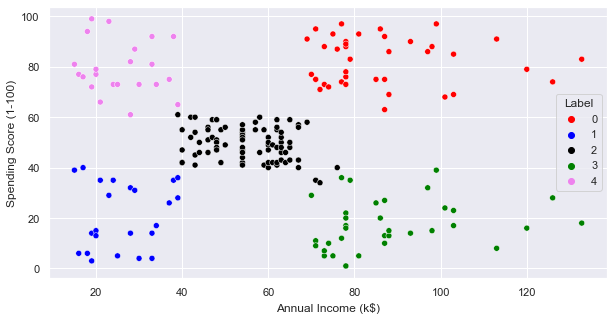

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue='Label',
                palette=['red','blue','black','green','violet'],legend='full',data=mcs1)
plt.show()

Cluster evaluation metrics (2 features)

In [24]:
ss_km_2d=silhouette_score(f2,l1)
dbs_km_2d=davies_bouldin_score(f2,l1)
print('Silhouette score for model is:',ss_km_2d)
print('davies_bouldin_score for model is:',dbs_km_2d)

Silhouette score for model is: 0.5549741217783033
davies_bouldin_score for model is: 0.5717961917449472


Clustering 3 features(3D)

In [25]:
mcs.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15.0,39,1


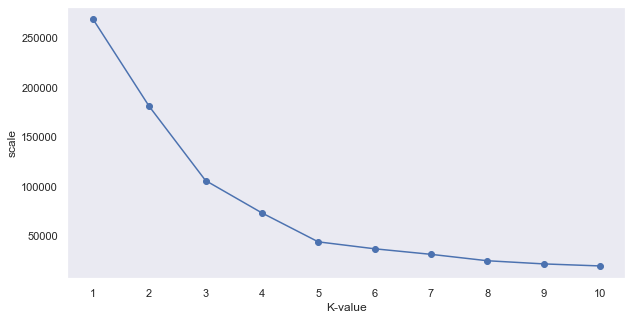

In [26]:
from mpl_toolkits.mplot3d import Axes3D
f3=mcs[['Age','Annual Income (k$)','Spending Score (1-100)']]
arr2=[]
for j in range(1,11):
    km2=KMeans(n_clusters=j,init='k-means++')
    km2.fit(f3)
    arr2.append(km2.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1,11),arr1,'b-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('scale')
plt.xticks(np.arange(1,11,1))
plt.show()
    


Silhouette Method(Optimal Number of k)

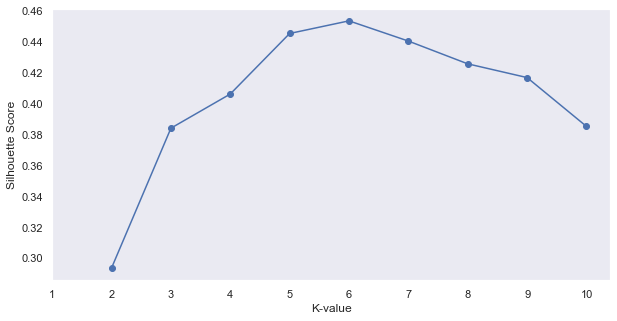

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score
silhouette_avg_3d=[]

for i in range(2,11):
    km2=KMeans(n_clusters=i,init='k-means++')
    km2.fit(f3)
    silhouette_avg_3d.append(silhouette_score(f3,km2.labels_))


plt.figure(figsize=(10,5))
plt.plot(range(2,11),silhouette_avg_3d,'b-o')
plt.grid()
plt.xlabel('K-value')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(1,11,1))
plt.show()

So K=5

In [44]:
km3=KMeans(n_clusters=5)
km3.fit(f3)
l2=km3.predict(f3)
mcs2=mcs
mcs2['Label']=l2
mcs2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15.00,39,2
1,2,1,21,15.00,81,3
2,3,0,20,16.00,6,2
3,4,0,23,16.00,77,3
4,5,0,31,17.00,40,2
...,...,...,...,...,...,...
195,196,0,35,120.00,79,0
196,197,0,45,126.00,28,4
197,198,1,32,126.00,74,0
198,199,1,32,132.75,18,4


3D scatter plot for clustering 

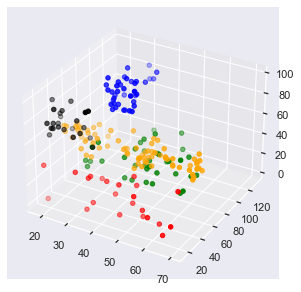

In [29]:
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(mcs2['Age'][mcs2.Label==0],mcs2['Annual Income (k$)'][mcs2.Label==0],
           mcs2['Spending Score (1-100)'][mcs2.Label==0],c='red')
ax.scatter(mcs2['Age'][mcs2.Label==1],mcs2['Annual Income (k$)'][mcs2.Label==1],
           mcs2['Spending Score (1-100)'][mcs2.Label==1],c='blue')
ax.scatter(mcs2['Age'][mcs2.Label==2],mcs2['Annual Income (k$)'][mcs2.Label==2],
           mcs2['Spending Score (1-100)'][mcs2.Label==2],c='green')
ax.scatter(mcs2['Age'][mcs2.Label==3],mcs2['Annual Income (k$)'][mcs2.Label==3],
           mcs2['Spending Score (1-100)'][mcs2.Label==3],c='black')
ax.scatter(mcs2['Age'][mcs2.Label==4],mcs2['Annual Income (k$)'][mcs2.Label==4],
           mcs2['Spending Score (1-100)'][mcs2.Label==4],c='orange')
plt.show()

Cluster Evaluation metrics (3 features)

In [30]:
ss_km_3d=silhouette_score(f3,l2)
dbs_km_3d=davies_bouldin_score(f3,l2)
print('Silhouette score for model is:',ss_km_3d)
print('davies_bouldin_score for model is:',dbs_km_3d)

Silhouette score for model is: 0.44513180310309386
davies_bouldin_score for model is: 0.8213194915513986


Customer id's and number of customers for each group

In [31]:
cust_grp1=mcs2[mcs2['Label']==0]
cust_grp2=mcs2[mcs2['Label']==1]
cust_grp3=mcs2[mcs2['Label']==2]
cust_grp4=mcs2[mcs2['Label']==3]
cust_grp5=mcs2[mcs2['Label']==4]
print('Total number of customers in group 1:',len(cust_grp1))
print('Customer IDs for group 1 are:',cust_grp1['CustomerID'].values)
print('Total number of customers in group 2:',len(cust_grp2))
print('Customer IDs for group 2 are:',cust_grp2['CustomerID'].values)
print('Total number of customers in group 3:',len(cust_grp3))
print('Customer IDs for group 3 are:',cust_grp3['CustomerID'].values)
print('Total number of customers in group 4:',len(cust_grp4))
print('Customer IDs for group 4 are:',cust_grp4['CustomerID'].values)
print('Total number of customers in group 5:',len(cust_grp5))
print('Customer IDs for group 5 are:',cust_grp5['CustomerID'].values)









Total number of customers in group 1: 23
Customer IDs for group 1 are: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]
Total number of customers in group 2: 39
Customer IDs for group 2 are: [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]
Total number of customers in group 3: 36
Customer IDs for group 3 are: [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]
Total number of customers in group 4: 23
Customer IDs for group 4 are: [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46]
Total number of customers in group 5: 79
Customer IDs for group 5 are: [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  

# Agglomerative Hierarchical Clustering

In [32]:
features=pd.read_csv('Mall_Customers.csv')
features.drop(columns=['CustomerID','Gender'],inplace=True)
features.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


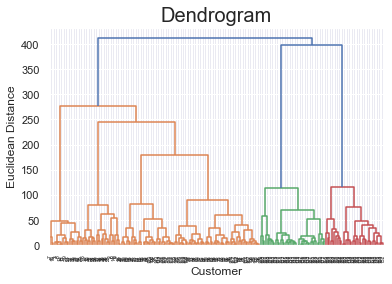

In [41]:
import scipy.cluster.hierarchy as sch 
dend=sch.dendrogram(sch.linkage(features,method='ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customer')
plt.ylabel('Euclidean Distance')
plt.show()

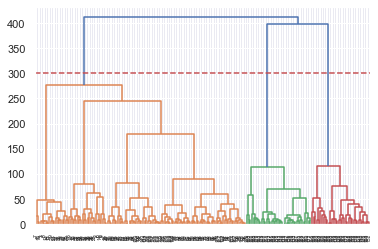

In [34]:
#Drawing horizontal line
dend_1=sch.dendrogram(sch.linkage(features,method='ward'))
plt.axhline(y=300,color='r',linestyle='--')
plt.show()

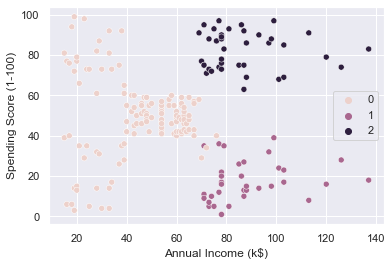

In [35]:
#Visualizing clusters(n_clusters=3)
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score,davies_bouldin_score
clust_1=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
clust_1.fit_predict(features)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=clust_1.labels_,data=features)
plt.show()

Cluster Evaluation Metrics (clusters=3)

In [36]:
ss_3c=silhouette_score(features,clust_1.labels_)
dbs_3c=davies_bouldin_score(features,clust_1.labels_)
print('Silhouette score for model is:',ss_3c)
print('davies_bouldin_score for model is:',dbs_3c)

Silhouette score for model is: 0.38141795042544546
davies_bouldin_score for model is: 0.8603032525623284


Trying n=4 & 5 clusters to compare results

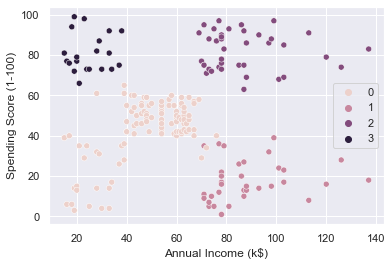

In [37]:
#Visualizing clusters(n_clusters=4)
from sklearn.cluster import AgglomerativeClustering
clust_2=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
clust_2.fit_predict(features)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=clust_2.labels_,data=features)
plt.show()

Cluster Evaluation Metrics (clusters=4)

In [38]:
ss_4c=silhouette_score(features,clust_2.labels_)
dbs_4c=davies_bouldin_score(features,clust_2.labels_)
print('Silhouette score for model is:',ss_4c)
print('davies_bouldin_score for model is:',dbs_4c)

Silhouette score for model is: 0.41037986351850747
davies_bouldin_score for model is: 0.8330032019223426


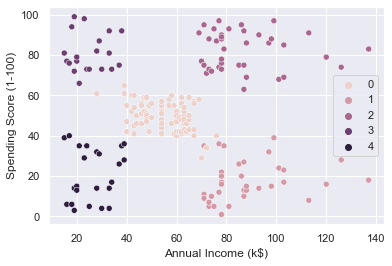

In [39]:
#Visualizing clusters(n_clusters=5)
from sklearn.cluster import AgglomerativeClustering
clust_3=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
clust_3.fit_predict(features)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',hue=clust_3.labels_,data=features)
plt.show()

Cluster Evaluation Metrics (clusters=5)

In [40]:
ss_5c=silhouette_score(features,clust_3.labels_)
dbs_5c=davies_bouldin_score(features,clust_3.labels_)
print('Silhouette score for model is:',ss_5c)
print('davies_bouldin_score for model is:',dbs_5c)

Silhouette score for model is: 0.4401889024290193
davies_bouldin_score for model is: 0.8216721951598936
